In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd
 
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
 
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv
/kaggle/input/titanic/train_and_test2.csv
/kaggle/input/test-dataset-for-titanic-competition/titanic_train.csv
/kaggle/input/test-dataset-for-titanic-competition/titanic_test.csv
/kaggle/input/testtitanic/titanic_data.csv


In [2]:
test_df = pd.read_csv("../input/test-dataset-for-titanic-competition/titanic_test.csv")
df = pd.read_csv("../input/test-dataset-for-titanic-competition/titanic_train.csv")
combine = [df, test_df]
print(combine)

[     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ...

In [3]:
#Which are available in the dataset? 
print(list(df.columns))

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Which features contain blank, null or empty values?
np.where(pd.isnull(df['Survived']))


(array([], dtype=int64),)

In [6]:
#Which features are categorical?
#Which features are numerical?

df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
print(df['Sex'].describe(),df['Age'].describe(),df['Cabin'].describe(), '\n',df['Embarked'].describe())

count      891
unique       2
top       male
freq       577
Name: Sex, dtype: object count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64 count             204
unique            147
top       C23 C25 C27
freq                4
Name: Cabin, dtype: object 
 count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [8]:
survived = df[df.Survived == 1]
unsurvived = df[df.Survived == 0]


In [9]:
print(survived.tail())

     PassengerId  Survived  Pclass  \
875          876         1       3   
879          880         1       1   
880          881         1       2   
887          888         1       1   
889          890         1       1   

                                              Name     Sex   Age  SibSp  \
875               Najib, Miss. Adele Kiamie "Jane"  female  15.0      0   
879  Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)  female  56.0      0   
880   Shelley, Mrs. William (Imanita Parrish Hall)  female  25.0      0   
887                   Graham, Miss. Margaret Edith  female  19.0      0   
889                          Behr, Mr. Karl Howell    male  26.0      0   

     Parch  Ticket     Fare Cabin Embarked  
875      0    2667   7.2250   NaN        C  
879      1   11767  83.1583   C50        C  
880      1  230433  26.0000   NaN        S  
887      0  112053  30.0000   B42        S  
889      0  111369  30.0000  C148        C  


In [10]:
corr = df.corr(method ='pearson')
corr_survived= survived.corr(method ='pearson')
corr_unsurvived= unsurvived.corr(method ='pearson')
corr1 =  pd.concat([corr_survived, corr_unsurvived] )
corr2 = corr/corr_survived
#ax = sns.heatmap(corr3 ,cmap='coolwarm',     annot=True,     annot_kws={'size':6})

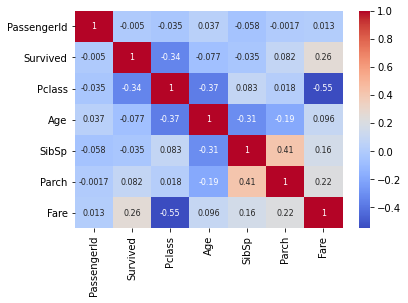

In [11]:
ax = sns.heatmap(corr,cmap='coolwarm',     annot=True,     annot_kws={'size':8})


In [12]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    
#pd.crosstab(df['Title'], df['Survived'])

In [13]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Dr', 'Major', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    dataset['Title'] = dataset['Title'].replace('Don', 'Mr')
    dataset['Title'] = dataset['Title'].replace('Rav', 'Mr')
    
df[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156371
3,Mrs,0.793651
4,Rare,0.500000
5,Rev,0.000000


In [14]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [15]:
#for dataset in combine:    
 #    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
#    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
#    dataset.loc[ dataset['Age'] > 64, 'Age']
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1.0


In [16]:
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

df[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,FamilySize,Survived
3,4,0.724138
2,3,0.578431
1,2,0.552795
6,7,0.333333
0,1,0.303538
4,5,0.200000
5,6,0.136364
7,8,0.000000
8,11,0.000000


In [17]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

df[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()



,IsAlone,Survived
0,0,0.505650
1,1,0.303538


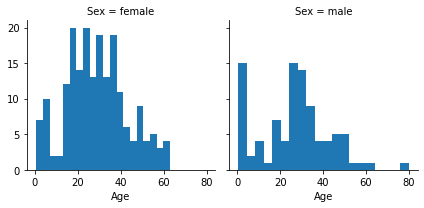

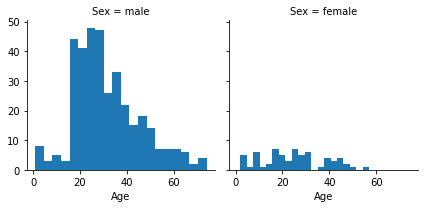

In [18]:
g = sns.FacetGrid(survived, col = 'Sex')
g.map(plt.hist , 'Age' , bins = 20)
g = sns.FacetGrid(unsurvived, col = 'Sex')
g.map(plt.hist , 'Age' , bins = 20)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Title        891 non-null    float64
 13  FamilySize   891 non-null    int64  
 14  IsAlone      891 non-null    int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 104.5+ KB


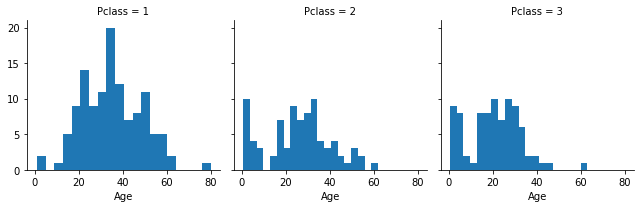

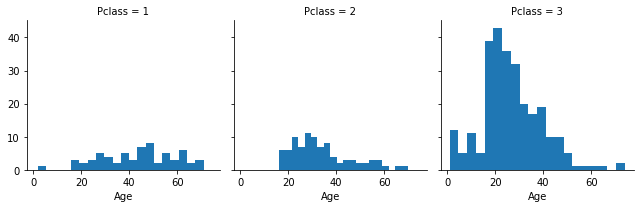

In [20]:
g = sns.FacetGrid(survived, col = 'Pclass')
g.map(plt.hist , 'Age' , bins = 20)
g = sns.FacetGrid(unsurvived, col = 'Pclass')
g.map(plt.hist , 'Age' , bins = 20)

In [21]:
#g = sns.FacetGrid(survived, col = 'Title')
#g.map(plt.hist , 'Age' , bins = 20)
#g = sns.FacetGrid(unsurvived, col = 'Title')
#g.map(plt.hist , 'Age' , bins = 20)

In [22]:
Sex = {'male': 1,'female': 0}

df['Sex'] = df['Sex'].apply(lambda x: Sex[x])
test_df['Sex'] = test_df['Sex'].apply(lambda x: Sex[x])

In [23]:
df1 = df
df1['Age'] = df1['Age'].fillna((df1['Age'].mean()))
test_df['Age'] = test_df['Age'].fillna((test_df['Age'].mean()))


In [24]:
print(df.tail(10))

     PassengerId  Survived  Pclass                                      Name  \
881          882         0       3                        Markun, Mr. Johann   
882          883         0       3              Dahlberg, Miss. Gerda Ulrika   
883          884         0       2             Banfield, Mr. Frederick James   
884          885         0       3                    Sutehall, Mr. Henry Jr   
885          886         0       3      Rice, Mrs. William (Margaret Norton)   
886          887         0       2                     Montvila, Rev. Juozas   
887          888         1       1              Graham, Miss. Margaret Edith   
888          889         0       3  Johnston, Miss. Catherine Helen "Carrie"   
889          890         1       1                     Behr, Mr. Karl Howell   
890          891         0       3                       Dooley, Mr. Patrick   

     Sex        Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
881    1  33.000000      0      0       

check the title of the passenger

print("Before", df.shape, test_df.shape, combine[0].shape, combine[1].shape)
df = df.drop(['Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1)
combine = [df, test_df]




"After", df.shape, test_df.shape, combine[0].shape, combine[1].shape

print(df.columns.values)
df.describe(include=['O'])
df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["SibSp", "Survived"]].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
df[["Parch", "Survived"]].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

In [26]:

mapping = {"S": 0,"C": 1, "Q": 2}
for dataset in combine:
    dataset['Embarked'] = dataset['Embarked'].map(mapping)
    dataset['Embarked'] = dataset['Embarked'].fillna(-1)

In [27]:
#survived['Embarked']=pd.to_numeric(survived.Embarked)
#df1['Embarked'] = df1['Embarked'].apply(int)

In [28]:
for dataset in combine:
    dataset['Age*Class'] = dataset.Age * dataset.Pclass
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,IsAlone,Age*Class
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,0.0,1.0,2,0,66.000000
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,1.0,3.0,2,0,38.000000
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0.0,2.0,1,1,78.000000
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,0.0,3.0,2,0,35.000000
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,0.0,1.0,1,1,105.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,0.0,0.0,1,1,54.000000
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,0.0,2.0,1,1,19.000000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,0.0,2.0,4,0,89.097353
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,1.0,1.0,1,1,26.000000


In [29]:
#df1['Embarked'] = df1['Embarked'].apply(int)
#df["Embarked"].astype(int)

In [30]:
df.Embarked = pd.to_numeric(df.Embarked, errors='coerce').astype(np.int64)

In [31]:
survived = df[df.Survived == 1]
unsurvived = df[df.Survived == 0]

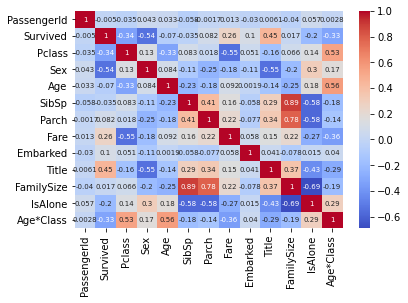

In [32]:
corr = df.corr(method ='pearson')
corr_survived= survived.corr(method ='pearson')
corr_unsurvived= unsurvived.corr(method ='pearson')
corr1 =  pd.concat([corr_survived, corr_unsurvived] )
corr2 = corr/corr_survived
ax = sns.heatmap(corr ,cmap='coolwarm',     annot=True,     annot_kws={'size':7})

In [33]:
df['Name'] = df['Name'].str.len()
df['Name'] = pd.to_numeric(df['Name'])
test_df['Name'] = test_df['Name'].str.len()
test_df['Name'] = pd.to_numeric(test_df['Name'])

In [34]:
df = df.drop(['Ticket', 'Cabin'], axis=1) 
test_df = test_df.drop(['Ticket', 'Cabin'], axis=1) 
combine = [df, test_df]

In [35]:
df = df.drop([ 'PassengerId','SibSp','Fare'], axis=1) 
test_df = test_df.drop([ 'SibSp','Fare'], axis=1) 
combine = [df, test_df]

In [36]:

df = df.drop([ 'Sex', 'Pclass'], axis=1) 
test_df = test_df.drop(['Sex', 'Pclass'], axis=1) 
print(list(test_df.columns))
print(list(df.columns))
test_df.info()

['PassengerId', 'Name', 'Age', 'Parch', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'Age*Class']
['Survived', 'Name', 'Age', 'Parch', 'Embarked', 'Title', 'FamilySize', 'IsAlone', 'Age*Class']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Name         418 non-null    int64  
 2   Age          418 non-null    float64
 3   Parch        418 non-null    int64  
 4   Embarked     418 non-null    int64  
 5   Title        418 non-null    float64
 6   FamilySize   418 non-null    int64  
 7   IsAlone      418 non-null    int64  
 8   Age*Class    418 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 29.5 KB


In [37]:
X_train= df.drop('Survived', axis=1)
Y_train= df['Survived']
X_test= test_df.drop('PassengerId', axis=1).copy()
X_train.shape , Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [38]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

98.77